In [2]:
import pandas as pd
from io import StringIO
import numpy as np
from bs4 import BeautifulSoup
import json

# JOBS

In [20]:
with open('Bureau of Labor Statistics Data.html', 'r') as f:
    contents = f.read()
soup = BeautifulSoup(contents, 'lxml')
tables = soup.findAll('table')[1:]

In [141]:
tables[0].caption.find('strong', text='Industry:\xa0\xa0\xa0\xa0\xa0\xa0').next_sibling
ind = {}
for table in tables: 
    coln = table.caption.find('strong', text='Industry:\xa0\xa0\xa0\xa0\xa0\xa0').next_sibling
    ind[coln] =  pd.read_html(str(table))[0].iloc[:3, :13].set_index('Year').stack()
df = pd.concat(ind, axis=1)
df = df.reset_index().rename({'level_1': 'Month'}, axis=1)
df['Month'] = df['Month'].apply(lambda x: x+' ')+df['Year'].apply(str)
df = df.drop('Year', axis=1).set_index('Month')
# df.to_json('job_openings_2018_2020_bls.json')
df = df.applymap(lambda x: x.replace('(C)','').replace('(P)','')).astype(int)
# df.to_json(orient='records')
df = df[~df.index.str.contains('2018')]
df['Total private']-df[privatelist].sum(axis=1)
# json_str = df.to_dict()
# str([{'name': key, 'data': list(json_str[key].values())} for key in json_str.keys()])

Month
Jan 2019   -11579
Feb 2019   -10620
Mar 2019   -11126
Apr 2019   -11101
May 2019   -11107
Jun 2019   -10968
Jul 2019   -10957
Aug 2019   -10794
Sep 2019   -10607
Oct 2019   -11129
Nov 2019   -10365
Dec 2019    -9829
Jan 2020   -10491
Feb 2020   -10427
Mar 2020    -8854
Apr 2020    -7147
May 2020    -7901
Jun 2020    -8993
Jul 2020    -9839
Aug 2020    -9460
Sep 2020    -9717
Oct 2020   -10019
dtype: int64

In [142]:

df[privatelist].sum(axis=1)

Month
Jan 2019    18387
Feb 2019    16963
Mar 2019    17751
Apr 2019    17641
May 2019    17707
Jun 2019    17465
Jul 2019    17486
Aug 2019    17223
Sep 2019    16932
Oct 2019    17675
Nov 2019    16435
Dec 2019    15667
Jan 2020    16722
Feb 2020    16663
Mar 2020    14138
Apr 2020    11479
May 2020    12637
Jun 2020    14340
Jul 2020    15718
Aug 2020    15096
Sep 2020    15512
Oct 2020    15969
dtype: int64

In [143]:

df['Total private']

Month
Jan 2019    6808
Feb 2019    6343
Mar 2019    6625
Apr 2019    6540
May 2019    6600
Jun 2019    6497
Jul 2019    6529
Aug 2019    6429
Sep 2019    6325
Oct 2019    6546
Nov 2019    6070
Dec 2019    5838
Jan 2020    6231
Feb 2020    6236
Mar 2020    5284
Apr 2020    4332
May 2020    4736
Jun 2020    5347
Jul 2020    5879
Aug 2020    5636
Sep 2020    5795
Oct 2020    5950
Name: Total private, dtype: int32

In [144]:
df.columns.tolist()

['Total nonfarm',
 'Total private',
 'Mining and logging',
 'Construction',
 'Manufacturing',
 'Durable goods manufacturing',
 'Nondurable goods manufacturing',
 'Trade, transportation, and utilities',
 'Wholesale trade',
 'Retail trade',
 'Transportation, warehousing, and utilities',
 'Information',
 'Financial activities',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Education and health services',
 'Educational services',
 'Health care and social assistance',
 'Leisure and hospitality',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services',
 'Government',
 'Federal',
 'State and local',
 'State and local government education',
 'State and local government, excluding education']

In [145]:
final_list = ['Mining and logging', 'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade', 'Transportation, warehousing, and utilities', 'Information', 'Financial activities', 'Professional and business services', 'Education and health services', 'Leisure and hospitality', 'Other services', 'Federal', 'State and local']
df = df[final_list]


In [146]:
df = df.rename({'Federal': 'Federal government', 'State and local': 'State and local government'}, axis=1)
df

,Mining and logging,Construction,Manufacturing,Wholesale trade,Retail trade,"Transportation, warehousing, and utilities",Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Federal government,State and local government
Month,,,,,,,,,,,,,,
Jan 2019,31,299,427,279,808,342,147,411,1386,1379,1125,174,139,573
Feb 2019,29,277,462,217,791,250,129,353,1404,1205,1001,224,130,575
Mar 2019,30,354,441,217,749,332,146,362,1355,1378,1022,239,136,604
Apr 2019,31,430,479,264,740,342,120,343,1178,1377,1017,218,154,590
May 2019,29,373,482,214,746,323,127,367,1268,1358,1018,294,111,590
Jun 2019,29,325,486,206,813,323,120,382,1290,1303,959,260,116,572
Jul 2019,40,353,477,169,838,281,172,381,1287,1325,957,249,129,579
Aug 2019,33,353,445,188,792,308,131,376,1288,1315,943,255,116,622
Sep 2019,34,333,441,193,743,345,169,349,1260,1216,995,248,112,608


In [147]:
final = df.to_dict()
str([{'name': key, 'data': list(final[key].values())} for key in final.keys()])

"[{'name': 'Mining and logging', 'data': [31, 29, 30, 31, 29, 29, 40, 33, 34, 23, 20, 13, 19, 26, 12, 10, 10, 16, 16, 15, 17, 22]}, {'name': 'Construction', 'data': [299, 277, 354, 430, 373, 325, 353, 353, 333, 325, 215, 216, 267, 296, 240, 247, 315, 244, 332, 275, 223, 230]}, {'name': 'Manufacturing', 'data': [427, 462, 441, 479, 482, 486, 477, 445, 441, 403, 401, 360, 408, 422, 310, 315, 306, 346, 430, 469, 492, 525]}, {'name': 'Wholesale trade', 'data': [279, 217, 217, 264, 214, 206, 169, 188, 193, 268, 188, 187, 172, 183, 156, 145, 153, 163, 179, 187, 180, 178]}, {'name': 'Retail trade', 'data': [808, 791, 749, 740, 746, 813, 838, 792, 743, 877, 752, 762, 759, 715, 626, 521, 670, 669, 773, 705, 671, 667]}, {'name': 'Transportation, warehousing, and utilities', 'data': [342, 250, 332, 342, 323, 323, 281, 308, 345, 327, 331, 244, 283, 270, 286, 217, 174, 243, 228, 238, 291, 257]}, {'name': 'Information', 'data': [147, 129, 146, 120, 127, 120, 172, 131, 169, 142, 136, 146, 152, 132, 1

In [113]:
privatelist = ['Total private',
 'Mining and logging',
 'Construction',
 'Manufacturing',
 'Durable goods manufacturing',
 'Nondurable goods manufacturing',
 'Trade, transportation, and utilities',
 'Wholesale trade',
 'Retail trade',
 'Transportation, warehousing, and utilities',
 'Information',
 'Financial activities',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Education and health services',
 'Educational services',
 'Health care and social assistance',
 'Leisure and hospitality',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services']
str((df[privatelist].sum(axis=1)//len(privatelist)).tolist())
#"Average Private"

'[835, 771, 806, 801, 804, 793, 794, 782, 769, 803, 747, 712, 760, 757, 642, 521, 574, 651, 714, 686, 705, 725]'

In [107]:
str(['Durable goods manufacturing',
 'Nondurable goods manufacturing','Wholesale trade',
 'Retail trade','Transportation, warehousing, and utilities','Finance and insurance',
 'Real estate and rental and leasing','Educational services',
 'Health care and social assistance','Arts, entertainment, and recreation',
 'Accommodation and food services',
 'State and local government education',
 'State and local government, excluding education'])

"['Durable goods manufacturing', 'Nondurable goods manufacturing', 'Wholesale trade', 'Retail trade', 'Transportation, warehousing, and utilities', 'Finance and insurance', 'Real estate and rental and leasing', 'Educational services', 'Health care and social assistance', 'Arts, entertainment, and recreation', 'Accommodation and food services', 'State and local government education', 'State and local government, excluding education']"

In [156]:
slope = df[(df.index == 'Sep 2019')|(df.index == 'Sep 2020')].to_dict()
slope
['September 2019', 'September 2020']
str([{'name': key, 'data': list(slope[key].values())} for key in slope.keys()])

"[{'name': 'Mining and logging', 'data': [34, 17]}, {'name': 'Construction', 'data': [333, 223]}, {'name': 'Manufacturing', 'data': [441, 492]}, {'name': 'Wholesale trade', 'data': [193, 180]}, {'name': 'Retail trade', 'data': [743, 671]}, {'name': 'Transportation, warehousing, and utilities', 'data': [345, 291]}, {'name': 'Information', 'data': [169, 121]}, {'name': 'Financial activities', 'data': [349, 301]}, {'name': 'Professional and business services', 'data': [1260, 1268]}, {'name': 'Education and health services', 'data': [1216, 1215]}, {'name': 'Leisure and hospitality', 'data': [995, 772]}, {'name': 'Other services', 'data': [248, 243]}, {'name': 'Federal government', 'data': [112, 95]}, {'name': 'State and local government', 'data': [608, 605]}]"

In [94]:
str(df.index.to_list())
str(df.columns.to_list())

"['Total nonfarm', 'Total private', 'Mining and logging', 'Construction', 'Manufacturing', 'Durable goods manufacturing', 'Nondurable goods manufacturing', 'Trade, transportation, and utilities', 'Wholesale trade', 'Retail trade', 'Transportation, warehousing, and utilities', 'Information', 'Financial activities', 'Finance and insurance', 'Real estate and rental and leasing', 'Professional and business services', 'Education and health services', 'Educational services', 'Health care and social assistance', 'Leisure and hospitality', 'Arts, entertainment, and recreation', 'Accommodation and food services', 'Other services', 'Government', 'Federal', 'State and local', 'State and local government education', 'State and local government, excluding education']"

In [83]:
# json.dumps([{'name': key, 'data': list(value.values())} for key, value in df.items()])
# [list(value.values()) for value in json_str.values()]
jstr = json.dumps([{'name': key, 'data': list(json_str[key].values())} for key in json_str.keys()])
with open('data/job_openingst.json', 'w') as f:
    json.dump([{'name': key, 'data': list(json_str[key].values())} for key in json_str.keys()], f)

In [51]:
total_nonfarm_sa.stack()

Year     
2015  Jan    5362
      Feb    5446
      Mar    5208
      Apr    5712
      May    5599
             ... 
2020  Aug    6352
      Sep    6494
      Oct    6652
      Nov     NaN
      Dec     NaN
Length: 72, dtype: object

In [144]:
industries = [total_nonfarm_sa, manufacturing_sa, prof_sa, ttu_sa, retail_tr_sa, ed_hlth_sa, fin_sa]
ind_keys = ['Total Nonfarm', 'Manufacturing', 'Prof & Business', 'Trade, Transport, Utils', 'Retail Trade', 'Education & Health', 'Financial']
ind = dict(zip(ind_keys, [x.stack() for x in industries]))
df = pd.concat(ind, axis=1)
df = df.reset_index().rename({'level_1': 'Month'}, axis=1)
df['Month'] = df['Month'].apply(lambda x: x+' ')+df['Year'].apply(str)
df = df.drop('Year', axis=1)
df = df[(df['Month'].str.contains('2018'))|(df['Month'].str.contains('2019'))|(df['Month'].str.contains('2020'))]
df = df[~df['Month'].str.contains('Nov 2020')|~df['Month'].str.contains('Dec 2020')].set_index('Month')
df.to_json('job_openings_2018_2020_bls.json')
df

,Total Nonfarm,Manufacturing,Prof & Business,"Trade, Transport, Utils",Retail Trade,Education & Health,Financial
Month,,,,,,,
Jan 2018,6645,440,1125,1396,902,1174,397
Feb 2018,6575,438,1115,1323,856,1177,409
Mar 2018,6865,424,1204,1420,926,1231,411
Apr 2018,6985,455,1209,1524,1029,1234,318
May 2018,7028,465,1234,1486,969,1205,359
Jun 2018,7280,474,1263,1472,965,1260,374
Jul 2018,7326,478,1256,1465,935,1257,439
Aug 2018,7249,502,1322,1289,789,1248,414
Sep 2018,7282,471,1337,1480,895,1270,366


In [46]:
# in the thousands
emp = pd.read_html('emp_by_ind.html')[0]
emp = emp[(emp['Month'].str.contains('2018'))|(emp['Month'].str.contains('2019'))|(emp['Month'].str.contains('2020'))].set_index('Month').astype('int')
emp = emp[~emp.index.str.contains('2018')]
# str(emp.index.tolist())
emp

"['Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'June 2019', 'July 2019', 'Aug 2019', 'Sept 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'Apr 2020', 'May 2020', 'June 2020', 'July 2020', 'Aug 2020', 'Sept 2020', 'Oct 2020', 'Nov 2020']"

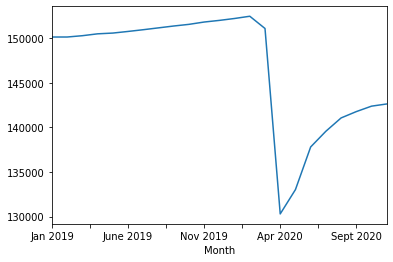

In [40]:
emp['Total nonfarm'].plot()

In [129]:
final_list

['Mining and logging',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation, warehousing, and utilities',
 'Information',
 'Financial activities',
 'Professional and business services',
 'Education and health services',
 'Leisure and hospitality',
 'Other services',
 'Federal',
 'State and local']

In [ ]:
'Mining and logging',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation, warehousing, and utilities',
 'Information',
 'Financial activities',
 'Professional and business services',
 'Education and health services',
 'Leisure and hospitality',
 'Other services',
 'Federal',
 'State and local'

In [131]:
emp.columns.tolist()

['Total nonfarm',
 'Total private',
 'Mining and logging',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Utilities',
 'Information',
 'Financial activities',
 'Professional and business services',
 'Education and health services',
 'Leisure and hospitality',
 'Other services',
 'Government',
 'Federal government',
 'State government',
 'Local government']

In [148]:
femp = emp[['Mining and logging',
 'Construction',
 'Manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Utilities',
 'Information',
 'Financial activities',
 'Professional and business services',
 'Education and health services',
 'Leisure and hospitality',
 'Other services',
 'Government',
 'Federal government',
 'State government',
 'Local government']]
femp['Transportation, warehousing, and utilities'] = femp['Transportation and warehousing']+ femp['Utilities']
femp['State and local'] = femp['State government']+ femp['Local government']
femp

,Mining and logging,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Utilities,Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Government,Federal government,State government,Local government,"Transportation, warehousing, and utilities",State and local
Month,,,,,,,,,,,,,,,,,,,
Jan 2019,746,7452,12825,5878,15696,5584,551,2843,8676,21126,23900,16496,5853,22506,2811,5170,14525,6135,19695
Feb 2019,741,7423,12830,5884,15667,5585,550,2841,8690,21164,23918,16473,5854,22513,2814,5175,14524,6135,19699
Mar 2019,741,7443,12827,5880,15642,5591,550,2851,8707,21176,23981,16494,5869,22528,2815,5175,14538,6141,19713
Apr 2019,741,7469,12829,5893,15631,5598,548,2845,8721,21226,24046,16507,5884,22553,2823,5169,14561,6146,19730
May 2019,743,7478,12829,5897,15618,5601,549,2853,8727,21253,24076,16519,5881,22551,2826,5158,14567,6150,19725
June 2019,741,7497,12838,5898,15613,5622,550,2865,8732,21294,24131,16526,5896,22553,2829,5157,14567,6172,19724
July 2019,736,7504,12845,5906,15614,5622,549,2862,8753,21337,24204,16528,5905,22587,2831,5168,14588,6171,19756
Aug 2019,731,7508,12848,5906,15613,5618,548,2861,8768,21377,24262,16570,5910,22637,2857,5184,14596,6166,19780
Sept 2019,731,7524,12851,5913,15622,5628,547,2866,8771,21402,24323,16631,5907,22650,2857,5181,14612,6175,19793


In [153]:
femp = femp.rename({'Federal': 'Federal government', 'State and local': 'State and local government'}, axis=1)
femp

,Mining and logging,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Utilities,Information,Financial activities,Professional and business services,Education and health services,Leisure and hospitality,Other services,Government,Federal government,State government,Local government,"Transportation, warehousing, and utilities",State and local government
Month,,,,,,,,,,,,,,,,,,,
Jan 2019,746,7452,12825,5878,15696,5584,551,2843,8676,21126,23900,16496,5853,22506,2811,5170,14525,6135,19695
Feb 2019,741,7423,12830,5884,15667,5585,550,2841,8690,21164,23918,16473,5854,22513,2814,5175,14524,6135,19699
Mar 2019,741,7443,12827,5880,15642,5591,550,2851,8707,21176,23981,16494,5869,22528,2815,5175,14538,6141,19713
Apr 2019,741,7469,12829,5893,15631,5598,548,2845,8721,21226,24046,16507,5884,22553,2823,5169,14561,6146,19730
May 2019,743,7478,12829,5897,15618,5601,549,2853,8727,21253,24076,16519,5881,22551,2826,5158,14567,6150,19725
June 2019,741,7497,12838,5898,15613,5622,550,2865,8732,21294,24131,16526,5896,22553,2829,5157,14567,6172,19724
July 2019,736,7504,12845,5906,15614,5622,549,2862,8753,21337,24204,16528,5905,22587,2831,5168,14588,6171,19756
Aug 2019,731,7508,12848,5906,15613,5618,548,2861,8768,21377,24262,16570,5910,22637,2857,5184,14596,6166,19780
Sept 2019,731,7524,12851,5913,15622,5628,547,2866,8771,21402,24323,16631,5907,22650,2857,5181,14612,6175,19793


In [155]:
final2 = femp[df.columns].to_dict()
str([{'name': key, 'data': list(final2[key].values())} for key in final2.keys()])

"[{'name': 'Mining and logging', 'data': [746, 741, 741, 741, 743, 741, 736, 731, 731, 735, 724, 715, 712, 714, 706, 653, 633, 626, 620, 619, 621, 623, 624]}, {'name': 'Construction', 'data': [7452, 7423, 7443, 7469, 7478, 7497, 7504, 7508, 7524, 7541, 7539, 7555, 7593, 7639, 7574, 6556, 7012, 7171, 7202, 7226, 7261, 7333, 7360]}, {'name': 'Manufacturing', 'data': [12825, 12830, 12827, 12829, 12829, 12838, 12845, 12848, 12851, 12810, 12868, 12866, 12844, 12852, 12806, 11489, 11729, 12062, 12103, 12133, 12193, 12226, 12253]}, {'name': 'Wholesale trade', 'data': [5878, 5884, 5880, 5893, 5897, 5898, 5906, 5906, 5913, 5923, 5926, 5933, 5937, 5934, 5922, 5537, 5560, 5612, 5592, 5605, 5637, 5642, 5653]}, {'name': 'Retail trade', 'data': [15696, 15667, 15642, 15631, 15618, 15613, 15614, 15613, 15622, 15644, 15630, 15672, 15669, 15672, 15586, 13287, 13673, 14531, 14785, 15046, 15061, 15156, 15122]}, {'name': 'Transportation, warehousing, and utilities', 'data': [6135, 6135, 6141, 6146, 6150, 6

In [65]:
prof = pd.read_html('Educational attainment.html')[0]
prof = prof.applymap(lambda x: x.replace('(1)','') if isinstance(x, str) else x).set_index(prof.columns[0]).iloc[:-1, 1:]
prof

,Less than high school diploma,High school diploma or equivalent,"Some college, no degree",Associate's degree,Bachelor's degree,Master's degree,Doctoral or professional degree
2019 National Employment Matrix title and code,,,,,,,
"Total, all occupations",8.1,23.6,20.3,9.6,23.5,10.5,4.4
Chief executives,1.4,8.6,14.5,5.4,39.9,23.3,6.9
General and operations managers,2.6,17.2,25.5,9.7,32.5,11.0,1.5
Legislators,1.4,8.6,14.5,5.4,39.9,23.3,6.9
Advertising and promotions managers,0.5,6.2,10.9,5.8,61.6,12.9,2.2
...,...,...,...,...,...,...,...
"Textile winding, twisting, and drawing out machine setters, operators, and tenders",29.3,43.3,14.1,8.0,2.7,2.6,0.0
"Extruding and forming machine setters, operators, and tenders, synthetic and glass fibers",30.3,34.5,14.2,9.3,9.3,2.0,0.4
Fabric and apparel patternmakers,30.3,34.5,14.2,9.3,9.3,2.0,0.4


In [92]:
sprof = prof[(prof.index.str.contains('Total'))|(prof.index.str.contains('Mechanical engineers'))|(prof.index.str.contains('Civil engineers'))|(prof.index.str.contains('Elementary'))|(prof.index.str.contains('Secondary'))|(prof.index.str.contains('Chief'))|(prof.index.str.contains('Data Scientists'))|(prof.index.str.contains('Data Scientists'))|(prof.index.str.contains('Lawyers'))]
# prof[(prof.index.str.contains('Law'))]
sprof.columns.tolist()
# sprof = sprof.transpose().to_dict()

['Less than high school diploma',
 'High school diploma or equivalent',
 'Some college, no degree',
 "Associate's degree",
 "Bachelor's degree",
 "Master's degree",
 'Doctoral or professional degree']

In [88]:
sprof

{'Total, all occupations': {'Less than high school diploma': 8.1,
  'High school diploma or equivalent': 23.6,
  'Some college, no degree': 20.3,
  "Associate's degree": 9.6,
  "Bachelor's degree": 23.5,
  "Master's degree": 10.5,
  'Doctoral or professional degree': 4.4},
 'Chief executives': {'Less than high school diploma': 1.4,
  'High school diploma or equivalent': 8.6,
  'Some college, no degree': 14.5,
  "Associate's degree": 5.4,
  "Bachelor's degree": 39.9,
  "Master's degree": 23.3,
  'Doctoral or professional degree': 6.9},
 'Civil engineers': {'Less than high school diploma': 0.4,
  'High school diploma or equivalent': 2.6,
  'Some college, no degree': 5.5,
  "Associate's degree": 5.1,
  "Bachelor's degree": 56.4,
  "Master's degree": 25.4,
  'Doctoral or professional degree': 4.5},
 'Mechanical engineers': {'Less than high school diploma': 0.7,
  'High school diploma or equivalent': 4.4,
  'Some college, no degree': 7.1,
  "Associate's degree": 9.9,
  "Bachelor's degree": 

In [89]:
str([{'name': key, 'data': list(sprof[key].values())} for key in sprof.keys()])

"[{'name': 'Total, all occupations', 'data': [8.1, 23.6, 20.3, 9.6, 23.5, 10.5, 4.4]}, {'name': 'Chief executives', 'data': [1.4, 8.6, 14.5, 5.4, 39.9, 23.3, 6.9]}, {'name': 'Civil engineers', 'data': [0.4, 2.6, 5.5, 5.1, 56.4, 25.4, 4.5]}, {'name': 'Mechanical engineers', 'data': [0.7, 4.4, 7.1, 9.9, 52.5, 22.4, 3.0]}, {'name': 'Lawyers', 'data': [0.2, 0.4, 0.7, 0.5, 5.5, 4.3, 88.4]}, {'name': 'Elementary school teachers, except special education', 'data': [0.0, 0.0, 3.1, 2.3, 42.9, 47.3, 4.3]}, {'name': 'Secondary school teachers, except special and career/technical education', 'data': [0.0, 0.0, 2.5, 1.8, 40.0, 50.8, 4.9]}]"